In [2]:
%load_ext google.cloud.bigquery

,state,birth_count
0,CA,13794114
1,TX,9986789
2,NY,8670137
3,IL,6032061
4,FL,5628888
5,OH,5147140


In [3]:
%matplotlib inline

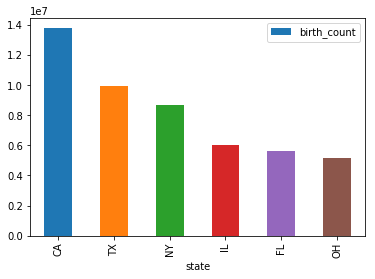

In [4]:
%%bigquery mother_list
SELECT
    mother_age,
    COUNT(*) AS mother_count
FROM `bigquery-public-data.samples.natality`
WHERE source_year >= 1998 AND source_year<= 2008
GROUP BY mother_age


,mother_age,mother_count
0,36,1253547
1,35,1493998
2,23,2333069
3,44,59437
4,20,2120190
5,21,2216757
6,16,496449
7,14,66656
8,53,142
9,54,91


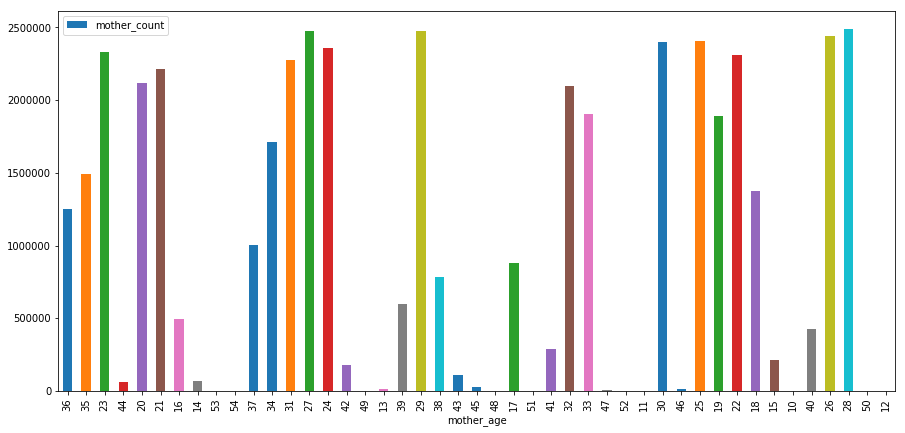

In [6]:
mother_list.plot(kind='bar', x='mother_age', y='mother_count', figsize=(15, 7));

In [4]:
%%bigquery father_avgage
SELECT
    AVG(father_age) as average_father_age
FROM `bigquery-public-data.samples.natality`
WHERE source_year >= 1998 AND source_year<= 2008

,average_father_age
0,39.937819


In [9]:
%%bigquery father_avgage_yearwise
SELECT
    source_year as year,
    AVG(father_age) as average_fatherage_yearwise
FROM `bigquery-public-data.samples.natality`
WHERE source_year >= 1998 AND source_year<= 2008
GROUP BY source_year
ORDER BY source_year

,year,average_fatherage_yearwise
0,1998,40.104848
1,1999,39.864549
2,2000,39.732720
3,2001,39.630709
4,2002,39.663417
5,2003,39.744694
6,2004,39.831135
7,2005,39.975258
8,2006,40.343240
9,2007,40.302761


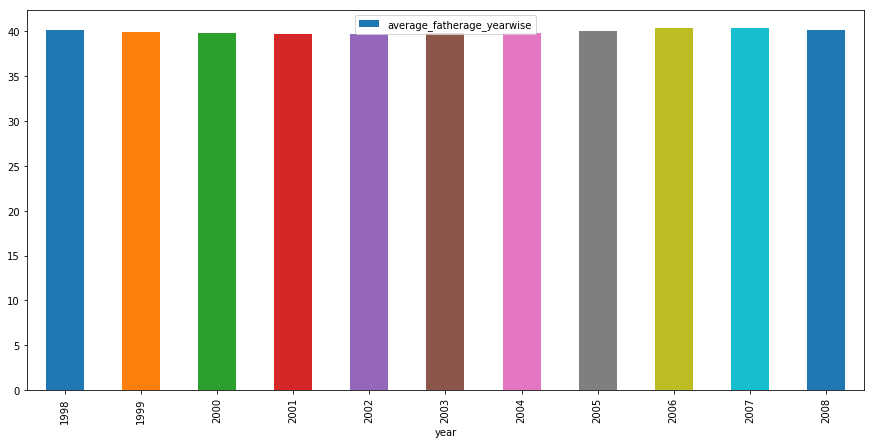

In [10]:
father_avgage_yearwise.plot(kind='bar', x='year', y='average_fatherage_yearwise', figsize=(15, 7));

In [5]:
%%bigquery total_births1
SELECT * from 
(SELECT state, COUNT(*) as birth_count
FROM `bigquery-public-data.samples.natality`
WHERE state IS NOT NULL
GROUP BY state
ORDER BY birth_count DESC
LIMIT 5)
UNION ALL
SELECT * from
(SELECT state, COUNT(*) as birth_count FROM `bigquery-public-data.samples.natality` 
 WHERE state IS NOT NULL AND state='OH'
 GROUP BY state 
 ORDER BY birth_count)

,state,birth_count
0,OH,5147140
1,CA,13794114
2,TX,9986789
3,NY,8670137
4,IL,6032061
5,FL,5628888


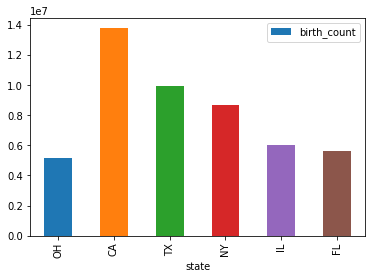

In [6]:
total_births1.plot(kind='bar', x='state', y='birth_count');